*  对于一个多维数组，我们会需要获取数组中某些区域的元素，或某个指定位置的元素，那么这时需要通过索引进行定位
	* 一般通过shape思路，通过坐标轴进行定位，如对于二维数组(3,8)中，对元素进行定位索引从0开始 [1,2]即取第一行第二列那个元素
	* 当取区域时，则划定行范围和列范围，符号“:”表示剩下元素 2：则表示取3行或3列开始往后的   2：4则指定了范围

* 数组的拷贝
	* 浅拷贝：引用，指向同一份数据，内存地址相同，当一个改变时，另外一个也会发生改变
	* 深拷贝：copy创建一份新的数据，与老的没有关系
 

#### 视图与副本
* 视图：即浅拷贝，指向的还是同一份数据，指向同一个内存地址
* 副本：copy

In [2]:
import numpy as np
x = np.array((1,2,3,4,5,6))
print('before',x)
y = x # 返回一个数据的视图，即当x发生改变时，y也会发生改变
z = x.copy() # 创建一个新的数组，拷贝到数组中，x和z指向不同的数据，当x发生改变时，对z没有改变
y[0]=-1

print(x)#发生改变
print(y)#发生改变
print(z)#可以发现z没有发生改变

before [1 2 3 4 5 6]
[-1  2  3  4  5  6]
[-1  2  3  4  5  6]
[1 2 3 4 5 6]


#### 切片与索引
* 切片只是返回原数组的视图，通过索引方式返回数组的部分
* 索引：通过圈定坐标轴的范围，返回指定范围的元素
    * 索引方式：([x,y,z]) x可以指定行范围，y,z类似
    * x：start:stop:step 不包含stop
    * 数组索引:传入索引值
 * 通过切片返回只是原来ndarray的视图，指向内存中同一地址的数据

In [3]:
import numpy as np
x = np.array([[1,2,3,4],[6,7,8,9],[10,11,12,13]])
print(type(x),x.dtype,x.shape,x)

y1 = x[2:,3] # 从第三行开始，取第4列的值，最后返回[13]
y2 = x[1:,2:] # 从第2行开始，取第4列的值，最后返回[9,13]
y3 = x[1:,]
y4 = x[1:] # 后面的y轴可以省略
y5 = x[1:2,0:5]
y6 = x[1:2,0:3:2] # step=2
y7 = x[1:2,0::2] # 没有设置stop值
index = [1,0,2] #对应的行号
y8 = x[index] # 数组索引
print(y1)
print(y2)
print(y3)
print(y4)
print('y5',y5)
print('y6',y6)
print('y7',y7)
print('y8',y8)

<class 'numpy.ndarray'> int32 (3, 4) [[ 1  2  3  4]
 [ 6  7  8  9]
 [10 11 12 13]]
[13]
[[ 8  9]
 [12 13]]
[[ 6  7  8  9]
 [10 11 12 13]]
[[ 6  7  8  9]
 [10 11 12 13]]
y5 [[6 7 8 9]]
y6 [[6 8]]
y7 [[6 8]]
y8 [[ 6  7  8  9]
 [ 1  2  3  4]
 [10 11 12 13]]


#### 其他索引
* dots索引：numpy允许使用...表示足够多的冒号来构建完整的索引列表，其实表示一种更简洁的写法
* 布尔索引：通过布尔数组来索引目标数组，如判断数组中>5的数据等

<class 'numpy.ndarray'> 3 (2, 2, 3) [[[10 38 19]
  [61 60 45]]

 [[74 53 78]
  [ 6 63 40]]]
bf x1 [[19 45]
 [78 40]]
af x1 [[19 45]
 [ 0  0]]
[[[10 38 19]
  [61 60 45]]

 [[74 53  0]
  [ 6 63  0]]]
af2 x [[[10 38 -1]
  [61 60 -1]]

 [[74 53 -1]
  [ 6 63 -1]]]
af2 x1 [[-1 -1]
 [-1 -1]]
bool index [10 38 61 60 74 53  6 63]
[[[ True  True False]
  [ True  True False]]

 [[ True  True False]
  [ True  True False]]]
50
25
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False

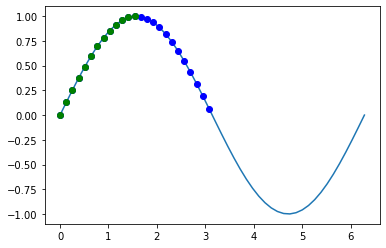

In [17]:
x = np.random.randint(1,100,[2,2,3]) # [2,2,3]指定了数组的shape 2个2*3的矩阵
print(type(x),x.ndim,x.shape,x)

x1 = x[...,2] # 第二列
print('bf x1',x1)
x1[1]=0 # 改变x1，原始x也会发生改变
print('af x1',x1)
print(x)
x[...,2]=-1 # 此时x发生改变，x1也会发生改变，因为内存指向同一地址数据
print('af2 x',x)
print('af2 x1',x1)

# 布尔索引
y=x[x>5] #获取数组大于5的数据
print('bool index',y)
y=x>5 #判断数组中各元素是否>5，所以返回一个布尔矩阵
print(y)


import numpy as np

import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 50)
y = np.sin(x)
print(len(x))  # 50
plt.plot(x, y)
# plt.show()
mask = y >= 0
print(len(x[mask]))  # 25
print(mask)


plt.plot(x[mask], y[mask], 'bo')

mask = np.logical_and(y >= 0, x <= np.pi / 2)
print(mask)
plt.plot(x[mask], y[mask], 'go')
plt.show()


#### 数组迭代
* for方式：遍历数组,一种通过for方式按照shape逐层迭代
* apply_along_axis(func1d, axis, arr) Apply a function to 1-D slices along the given axis
    * axis表示指定遍历的坐标轴，arra即传入的数组，func1d即对指定的区域要进行的操作，如np.sum,np.mean
    * func1d可以是自定义方法，传入的是一个一维的切片，即某一行或某一列
    * apply_along_axis顾名思义：沿着坐标轴应用funcld函数

In [42]:
x = np.random.randint(1,30,[2,2,3])
print(type(x),x.size,x.ndim,x.shape,x)
ele_x = []
def iter_arra(x):
    if type(x) is np.ndarray:
        for x1 in x:
            iter_arra(x1)
           
    else:
        print('ele x',type(x),x)
        ele_x.append(x)
        return x
iter_arra(x)
print(ele_x)

x2 = x[1,...]
print('x2',x2) #通过dots方式索引
x3 = np.apply_along_axis(np.sum,0,x2) # 表示对第每一列进行sum操作
print('x3',x3)
x4 = np.apply_along_axis(np.sum,1,x2) # 表示对第每一行进行sum操作
print('x4',x4)

#自定义func1d
def my_func1d(x):
    print('ele x',x,'x[0]',x[0],'x[-1]',x[-1])
    return x[0] + x[-1] * 0.5
x5 = np.apply_along_axis(my_func1d,0,x2)
print('x5',x5)

<class 'numpy.ndarray'> 12 3 (2, 2, 3) [[[18  6  4]
  [14 16 11]]

 [[14 22 27]
  [14 29 26]]]
ele x <class 'numpy.int32'> 18
ele x <class 'numpy.int32'> 6
ele x <class 'numpy.int32'> 4
ele x <class 'numpy.int32'> 14
ele x <class 'numpy.int32'> 16
ele x <class 'numpy.int32'> 11
ele x <class 'numpy.int32'> 14
ele x <class 'numpy.int32'> 22
ele x <class 'numpy.int32'> 27
ele x <class 'numpy.int32'> 14
ele x <class 'numpy.int32'> 29
ele x <class 'numpy.int32'> 26
[18, 6, 4, 14, 16, 11, 14, 22, 27, 14, 29, 26]
x2 [[14 22 27]
 [14 29 26]]
x3 [28 51 53]
x4 [63 69]
ele x [14 14] x[0] 14 x[-1] 14
ele x [22 29] x[0] 22 x[-1] 29
ele x [27 26] x[0] 27 x[-1] 26
x5 [21.  36.5 40. ]
